In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib widget

In [14]:
arteo_df_clean=pd.read_csv("arteo_df_clean.csv")
ucb_df_clean=pd.read_csv("ucb_df_clean.csv")
ref_signal = pd.read_csv("ref_signal_comp.csv",header=None).values[:200]

arteo_df_clean.shape

(201, 49)

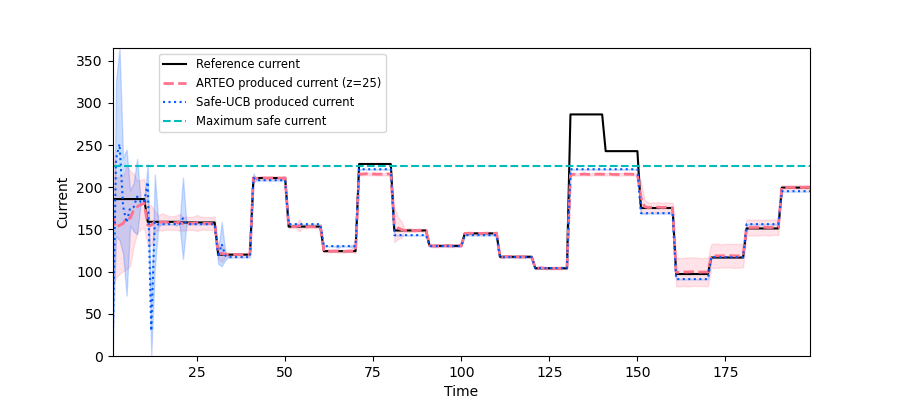

In [15]:
plt.figure(figsize=(9,4))
plt.plot(np.arange(1,200,1), ref_signal[:-1], color = "k", label="Reference current")
plt.plot(np.arange(1,200,1), arteo_df_clean.mean(axis=1).values[2:], color="#ff748c", linestyle="--", linewidth=2, label = "ARTEO produced current (z=25)")
plt.fill_between(np.arange(1,200,1), arteo_df_clean.mean(axis=1).values[2:] - arteo_df_clean.std(axis=1).values[2:],  arteo_df_clean.mean(axis=1).values[2:] + arteo_df_clean.std(axis=1).values[2:], color = "#ff748c", alpha=0.2)
plt.plot(np.arange(1,200,1), ucb_df_clean.mean(axis=1).values[2:], color = "#005aff", label="Safe-UCB produced current",linestyle=":")
plt.fill_between(np.arange(1,200,1), ucb_df_clean.mean(axis=1).values[2:] - ucb_df_clean.std(axis=1).values[2:],  ucb_df_clean.mean(axis=1).values[2:] + ucb_df_clean.std(axis=1).values[2:], color = "#005aff", alpha=0.2)
plt.hlines(160*1.41,1,200,colors="#00bbbb", linestyles="--", linewidth=1.5, label="Maximum safe current")
plt.xlim(1,199)
plt.xlabel("Time")
plt.ylabel("Current")
plt.margins(0)
plt.legend(loc="best",bbox_to_anchor=(0.2, 0., 0.2, 1), fontsize="small")
plt.show()

In [16]:
arteo_df_regret = arteo_df_clean.iloc[2:].copy()
arteo_df_regret["reference"] = ref_signal[:-1]


arteo_df_regret.loc[arteo_df_regret['reference'] > 225.6, 'reference'] = 225.6

arteo_df_regret.update(arteo_df_regret[arteo_df_regret.columns.tolist()[:-1]].sub(arteo_df_regret.reference, axis=0))
arteo_df_regret = arteo_df_regret.abs()
arteo_df_regret = arteo_df_regret.cumsum()

In [17]:
ucb_df_regret = ucb_df_clean.iloc[2:].copy()
ucb_df_regret["reference"] = ref_signal[:-1]


ucb_df_regret.loc[ucb_df_regret['reference'] > 225.6, 'reference'] = 225.6

ucb_df_regret.update(ucb_df_regret[ucb_df_regret.columns.tolist()[:-1]].sub(ucb_df_regret.reference, axis=0))
ucb_df_regret = ucb_df_regret.abs()
ucb_df_regret = ucb_df_regret.cumsum()
ucb_df_regret

,1,4,5,6,11,13,14,15,18,19,...,88,89,91,92,94,96,97,98,99,reference
2,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,...,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005,186.003005
3,228.768370,468.777700,195.325200,195.325400,403.669624,273.453628,228.768380,286.475232,254.811572,202.725170,...,267.833032,215.746630,429.712984,267.833024,208.345790,221.367394,228.768214,312.518598,403.669620,372.006010
4,342.262205,491.120395,243.711115,230.689735,412.990859,303.197405,245.490555,316.219005,310.598197,212.046565,...,336.641459,329.240605,439.035819,284.555043,347.901785,386.947783,303.199169,329.240605,412.990815,558.009015
5,385.027570,559.928900,325.541200,312.519800,422.312094,325.540028,319.919850,351.583232,372.005630,306.898330,...,463.157032,345.962630,520.865840,345.962624,370.244570,422.312172,312.522124,351.583398,481.799400,744.012020
6,558.008935,576.651005,355.284885,329.241865,595.293475,329.240605,329.241145,355.283805,381.327005,355.284165,...,498.521405,368.305405,537.587861,355.285479,543.225785,595.293383,316.222533,355.283805,498.521585,930.015025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1419.006810,1458.063850,1223.673410,1140.363062,1541.824200,1119.511582,1158.576660,1184.619346,1210.661472,1184.618370,...,1288.775936,1171.578070,1413.511339,1158.557358,1554.841220,1593.888408,1119.491338,1244.228873,1348.724142,30751.274837
197,1423.253213,1462.309653,1227.919013,1144.608465,1546.070763,1123.758105,1162.823163,1188.865829,1214.907895,1188.864773,...,1293.020959,1175.823073,1417.756302,1162.802301,1559.086123,1598.133271,1123.736181,1248.473696,1352.970745,30950.845640
198,1427.499616,1466.555456,1232.164616,1148.853868,1550.317326,1128.004628,1167.069666,1193.112312,1219.154318,1193.111176,...,1297.265982,1180.068076,1422.001265,1167.047244,1563.331026,1602.378134,1127.981024,1252.718519,1357.217348,31150.416443
199,1431.746019,1470.801259,1236.410219,1153.099271,1554.563889,1132.251151,1171.316169,1197.358795,1223.400741,1197.357579,...,1301.511005,1184.313079,1426.246228,1171.292187,1567.575929,1606.622997,1132.225867,1256.963342,1361.463951,31349.987247


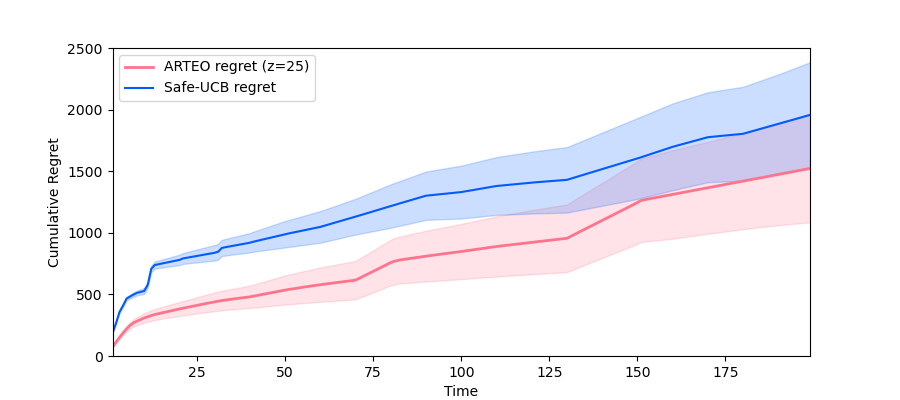

In [18]:
plt.figure(figsize=(9,4))
plt.plot(np.arange(1,200,1), arteo_df_regret.mean(axis=1), color="#ff748c", linewidth=2, label = "ARTEO regret (z=25)")
plt.fill_between(np.arange(1,200,1), arteo_df_regret.mean(axis=1) - 0.1*arteo_df_regret.std(axis=1),  arteo_df_regret.mean(axis=1) +  0.1*arteo_df_regret.std(axis=1), color = "#ff748c", alpha=0.2)
plt.plot(np.arange(1,200,1), ucb_df_regret.mean(axis=1), color = "#005aff", label="Safe-UCB regret")
plt.fill_between(np.arange(1,200,1), ucb_df_regret.mean(axis=1) -  0.1*ucb_df_regret.std(axis=1),  ucb_df_regret.mean(axis=1) +  0.1*ucb_df_regret.std(axis=1), color = "#005aff", alpha=0.2)
plt.xlim(1,199)
plt.ylim(bottom=0)
plt.xlabel("Time")
plt.ylabel("Cumulative Regret")
plt.margins(0)
plt.legend(loc="upper left", fontsize="medium")
plt.show()